In [7]:
import pandas as pd

## LKPP Dataset

In [8]:
df_lkpp = pd.read_json("../data/clean/lkpp-products.jsonl", lines=True)
df_lkpp.head(2)

,id,sku,product_name,price,stock,unit_measurement,is_inactive,expiry_date,bmp_score,tkdn_score,...,color,warning_wrong_category,warning_wrong_description,tag_umkk,tag_verified_vendor,tag_official_vendor,tag_produk_dalam_negeri,description,extra_description,url
0,83451581,4522100001-LTN-224654966,LAPTOP ADMINISTRASI PERKANTORAN AXIOO,12500000,5.0,unit,True,1.735603e+12,NaN,99.64,...,Grey,True,True,True,True,False,True,- Processor: Intel Core™ I5- 3.70 GHz - Frekue...,-,https://e-katalog.lkpp.go.id/katalog/produk/de...
1,84521755,4522100001-LTN-230428659,ACER LAPTOP TRAVELMATE P214 CORE I5/8 GB/512 G...,18300000,312.0,unit,False,1.767139e+12,NaN,99.04,...,-,False,False,True,True,False,True,Travelmate P214 Core-i5 8G 512GB SSD 14 Inch W...,Garansi 2 tahun part & 3 tahun labor,https://e-katalog.lkpp.go.id/katalog/produk/de...


In [9]:
df_lkpp_categories = pd.read_json("../data/clean/lkpp-products-category.jsonl", lines=True)
df_lkpp_categories.head(2)

,id,category,product_name
0,83451581,LAPTOP,LAPTOP ADMINISTRASI PERKANTORAN AXIOO
1,84521755,LAPTOP,ACER LAPTOP TRAVELMATE P214 CORE I5/8 GB/512 G...


[Text(0, 0, '2037'), Text(0, 0, '27'), Text(0, 0, '15')]

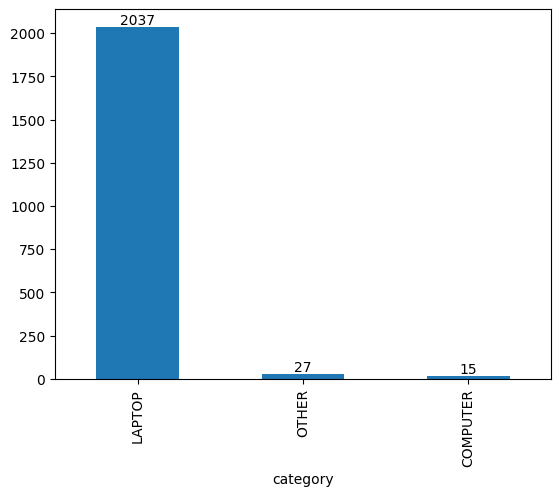

In [10]:
ax = df_lkpp_categories["category"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [11]:
df_lkpp_laptops = (
    df_lkpp
    .merge(df_lkpp_categories, on="id")
    .drop(columns=["product_name_y"])
    .rename(columns={"product_name_x": "product_name"})
)

df_lkpp_laptops = df_lkpp_laptops[df_lkpp_laptops["category"] == "LAPTOP"]
df_lkpp_laptops.head(2)

,id,sku,product_name,price,stock,unit_measurement,is_inactive,expiry_date,bmp_score,tkdn_score,...,warning_wrong_category,warning_wrong_description,tag_umkk,tag_verified_vendor,tag_official_vendor,tag_produk_dalam_negeri,description,extra_description,url,category
0,83451581,4522100001-LTN-224654966,LAPTOP ADMINISTRASI PERKANTORAN AXIOO,12500000,5.0,unit,True,1.735603e+12,NaN,99.64,...,True,True,True,True,False,True,- Processor: Intel Core™ I5- 3.70 GHz - Frekue...,-,https://e-katalog.lkpp.go.id/katalog/produk/de...,LAPTOP
1,83451581,4522100001-LTN-224654966,LAPTOP ADMINISTRASI PERKANTORAN AXIOO,12500000,5.0,unit,True,1.735603e+12,NaN,99.64,...,True,True,True,True,False,True,- Processor: Intel Core™ I5- 3.70 GHz - Frekue...,-,https://e-katalog.lkpp.go.id/katalog/produk/de...,LAPTOP


In [12]:
def derive_description(x: pd.Series):
    short_desc = x['product_name']

    if x['processor'] is not None and len(x['processor']) > 1:
        short_desc += f"\nprocessor: {x['processor']}"
    
    if not pd.isna(x['memory']) and x['memory'] > 1:
        short_desc += f"\nmemory: {x['memory']} GB"

    if not pd.isna(x['storage']) and x['storage'] > 1:
        short_desc += f"\nstorage: {x['storage']} GB"

    if x['graphics_card'] is not None and len(x['graphics_card']) > 1:
        short_desc += f"\ngraphics_card: {x['graphics_card']}"
    
    return short_desc

In [13]:
df_lkpp_laptops_derive = df_lkpp_laptops.copy()
df_lkpp_laptops_derive["description"] = df_lkpp_laptops_derive["description"] + "\n\n" + df_lkpp_laptops_derive["extra_description"]
df_lkpp_laptops_derive["extra_description"] = df_lkpp_laptops.apply(derive_description, axis=1)

In [14]:
df_lkpp_laptops_derive.to_json("../data/clean/lkpp-products-filtered.jsonl", orient="records", lines=True)

## E-commerce Dataset

In [15]:
df_ecom = pd.read_json("../data/clean/ecom-products.jsonl", lines=True)
df_ecom.head(2)

,id,product_name,initial_price,final_price,seller_name,description,url,extra_descripton
0,6f6d353462836c7b0a641413a78eec014dd9528bffb1d3...,MSI THIN 15 B12UC RTX3050 I5-12450H 8GB 512GB ...,14399000,9799000,AGRES ID,PROMO SPECIAL !!\nFREE SPEAKER HOME THEATER (S...,https://www.tokopedia.com/agresid/msi-thin-15-...,None
1,2cf4400e5eb525758f9f4e4e31a9976ec20343299065bd...,MSI KATANA 15 B13VEK i7-13620H 16GB 1TB SSD RT...,19999000,16999000,MSI Official Store,Katana 15 B13VEK-1851ID - INCLUDE OHS2021\n\nB...,https://www.tokopedia.com/msi-official/msi-kat...,None


In [16]:
df_ecom_category = pd.read_json("../data/clean/ecom-products-category.jsonl", lines=True)
df_ecom_category.head(2)

,id,category,product_name
0,6f6d353462836c7b0a641413a78eec014dd9528bffb1d3...,LAPTOP,MSI THIN 15 B12UC RTX3050 I5-12450H 8GB 512GB ...
1,2cf4400e5eb525758f9f4e4e31a9976ec20343299065bd...,LAPTOP,MSI KATANA 15 B13VEK i7-13620H 16GB 1TB SSD RT...


[Text(0, 0, '11451'), Text(0, 0, '4065'), Text(0, 0, '190')]

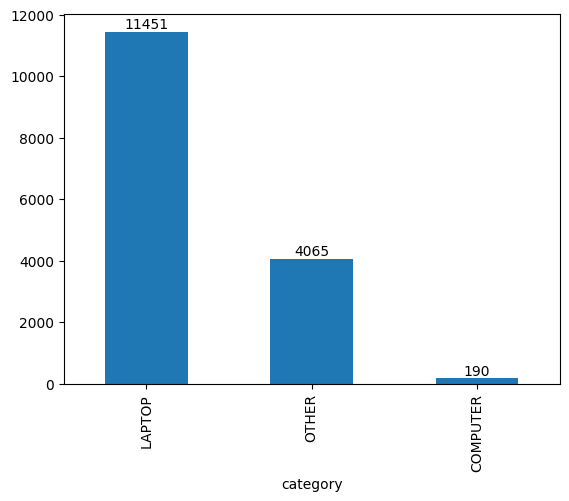

In [17]:
ax = df_ecom_category["category"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [18]:
df_ecom_laptops = (
    df_ecom
    .merge(df_ecom_category, on="id")
    .drop(columns=["product_name_y"])
    .rename(columns={"product_name_x": "product_name"})
)

df_ecom_laptops = df_ecom_laptops[df_ecom_laptops["category"] == "LAPTOP"]
df_ecom_laptops.head(2)

,id,product_name,initial_price,final_price,seller_name,description,url,extra_descripton,category
0,6f6d353462836c7b0a641413a78eec014dd9528bffb1d3...,MSI THIN 15 B12UC RTX3050 I5-12450H 8GB 512GB ...,14399000,9799000,AGRES ID,PROMO SPECIAL !!\nFREE SPEAKER HOME THEATER (S...,https://www.tokopedia.com/agresid/msi-thin-15-...,None,LAPTOP
1,2cf4400e5eb525758f9f4e4e31a9976ec20343299065bd...,MSI KATANA 15 B13VEK i7-13620H 16GB 1TB SSD RT...,19999000,16999000,MSI Official Store,Katana 15 B13VEK-1851ID - INCLUDE OHS2021\n\nB...,https://www.tokopedia.com/msi-official/msi-kat...,None,LAPTOP


In [19]:
df_ecom_laptops.to_json("../data/clean/ecom-products-filtered.jsonl", orient="records", lines=True)